In [5]:
'''The required libraries are imported.'''

import pandas as pd
import numpy as np
import os
import warnings
import random


In [6]:
'''Directory where bets data download is set'''

file_directory='C:/Users/Ozan Ozturk/Downloads'
os.chdir(file_directory)
warnings.filterwarnings("ignore")

In [7]:
'''Bets data readed and merged'''

df1=pd.read_csv('E0 (1).csv')
df2=pd.read_csv('E0 (2).csv')
df3=pd.read_csv('E0 (3).csv')
merged_df=pd.concat([df1,df2,df3],sort=False)

<h2>Task 1</h2>
<h2>1.Plot the following histogram diagrams</h2><br>
    a)Home Score(goals))<br>
    b)Away Score(goals)<br>
    c)Home Score(goals) - Away Score(goals)<br>
    
    
Name all y-axes “Number of Games”, and each x-axis “Home Goals”, “Away Goals” and “Home goals – Away Goals” for each plot respectively. 
    

Explanation of column names can be can be found on [link](https://docs.google.com/spreadsheets/d/16aZYItIHmGmqaLnRaW0XUMcwFFNxhcLB6nKqpzog06c/edit#gid=0).

In [8]:
Home_Score = merged_df['FTHG']
Away_Score = merged_df['FTAG']
Diff_Score = Home_Score - Away_Score 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist(x,name):
    '''This function plots the histogram of the given series'''
    plt.xlabel(name)
    plt.ylabel('Number of Games')
    plt.title('Histogram')
    plt.hist(x,bins=max(x)-min(x), alpha=0.5, histtype='bar', ec='black')
    return plt.show()

plot_hist(Home_Score,'Home_Score (goals)')
plot_hist(Away_Score,'Away_Score (goals)')
plot_hist(Diff_Score,'Home_Score (goals) - Away Score (goals)')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<h2>Task 1</h2>
<h2>2)To which probability distribution do home and away goals fitting well?</h2><br>
Does the distribution
look like Poisson distribution? Calculate the expected number of games corresponding to each
quantile (number of goals) with Poisson distribution by using sample means as distribution
mean and plot these values on the histogram. Is this consistent with Poisson distribution claim?
In other words, compare the actual outcomes with the theoretical distribution on a plot.

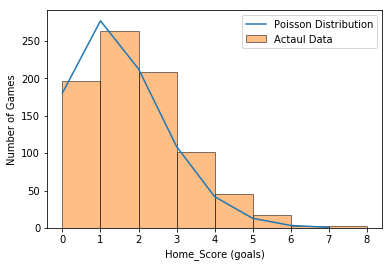

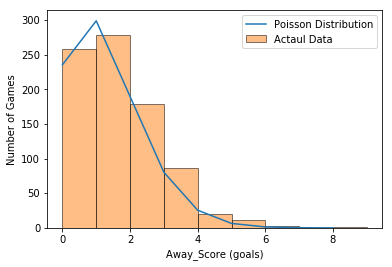

In [10]:
from scipy.stats import poisson

def check_poisson_distribution(x,name):
    '''This function calculates and plots the probability mass function of a poisson distribution
    and runs plot_hist function'''
    poisson_data=poisson.pmf(np.arange(min(x),max(x)), mu=np.mean(x))*len(x)
    plt.xlabel(name)
    plt.ylabel('Number of Games')
    plt.plot(poisson_data,label='Poisson Distribution')
    plt.hist(x,bins=max(x)-min(x), alpha=0.5, histtype='bar', ec='black',label='Actaul Data')
    plt.legend()
    return plt.show()

check_poisson_distribution(Home_Score,'Home_Score (goals)')
check_poisson_distribution(Away_Score,'Away_Score (goals)')    

<h2>Task 2</h2><br>
The aim of this task is to understand if bookmakers are good enough in setting their odds for “draw”
bets. An empirical evidence for the probability of “draw” can be calculated by determining the certain
probability intervals on the implied probabilities by the bookmakers for the specific result. Once you
determine a probability range (i.e. a bookmaker’s implied draw probability is 0.4 for a specific game
and your probability range is 0.38 and 0.42), you can count the games that finished as draw within this
range. In other words, we can discretize probability of draw values into bins (i.e. (0.00,0.05], (0.05,
0.10], …, (0.95,1.00]) and calculate the number of games ended as “draw” in the corresponding bin.
Dividing this value by the total number of games in the corresponding bin will provide the estimated
probability of “draws”. Please note that implied probabilities may not be larger than a certain value
(since it is not reasonable), modify your bins accordingly if this is the case. Aforementioned bins are
provided for illustration purposes. If bookmakers are good enough in determining odds (in other words,
if they make money), what you expect to see is that fraction of games finished as “draw" is between
this implied probability range. Select at least 4 bookmakers for this task.

<ul>
    <li>Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd.</li><br>
    <ul/> 

In [11]:
bet_companies=['B365','BW','IW','PS','WH','VC']
possible_outcomes=['H','D','A']

def get_all_bet_ratios(df,bet_companies,possible_outcomes):
    '''This function stores all bet ratios for each bet companies in a dictionary'''
    dict1={}    
    for k in bet_companies:
        list1=[]
        for j in possible_outcomes: 
            list1.append(k+j)
        dict1.update({k:df[list1]})
    return dict1

def prob_transform_df(df):
    '''This function takes the inverse of the columns of a given dataframe'''
    return df.apply(lambda x: 1/x)



bet_ratios=get_all_bet_ratios(merged_df,bet_companies,possible_outcomes)
bet_probs_with_margin={k:prob_transform_df(v) for k,v in bet_ratios.items()}

Lets look at the bet probabilities for P(home win), P(tie) and P(away win) with respect to P(x) = 1/odd condition.

In [12]:
bet_probs_with_margin

{'B365':         B365H     B365D     B365A
 0    0.166667  0.230947  0.653595
 1    0.322581  0.307692  0.421941
 2    0.781250  0.166667  0.105263
 3    0.465116  0.294118  0.294118
 4    0.263158  0.277778  0.512821
 ..        ...       ...       ...
 375  0.769231  0.166667  0.090909
 376  0.781250  0.153846  0.090909
 377  0.694444  0.210526  0.117647
 378  0.454545  0.285714  0.285714
 379  0.444444  0.266667  0.312500
 
 [838 rows x 3 columns], 'BW':           BWH       BWD       BWA
 0    0.181818  0.235294  0.636943
 1    0.333333  0.312500  0.408163
 2    0.793651  0.160000  0.095238
 3    0.465116  0.294118  0.294118
 4    0.270270  0.277778  0.500000
 ..        ...       ...       ...
 375  0.769231  0.173913  0.105263
 376  0.800000  0.160000  0.090909
 377  0.704225  0.210526  0.137931
 378  0.476190  0.285714  0.285714
 379  0.454545  0.270270  0.322581
 
 [838 rows x 3 columns], 'IW':           IWH       IWD       IWA
 0    0.166667  0.256410  0.636943
 1    0.317460  0.

 <li>Then calculate these probabilities again using normalization formula at “Odds and Probabilities”
part for each bookmarker.</li><br>


In [13]:
def odds_formula(x):
    '''This function applies the 'Odds and Probabalities' formula for given series'''
    prob=1/x
    return prob*(1/sum(prob))

def odds_formula_transform(df):
    '''This function transform the given dataframe with respect to odd_formula'''
    return df.T.apply(lambda x: odds_formula(x)).T
    
bet_probs={k:odds_formula_transform(v) for k,v in bet_ratios.items()}


Lets look at the bet probabilities for P(home win), P(tie) and P(away win) using normalization formula.

In [14]:
bet_probs

{'B365':         B365H     B365D     B365A
 0    0.158548  0.219697  0.621756
 1    0.306573  0.292424  0.401003
 2    0.741801  0.158251  0.099948
 3    0.441558  0.279221  0.279221
 4    0.249733  0.263607  0.486660
 ..        ...       ...       ...
 375  0.749149  0.162316  0.088536
 376  0.761448  0.149947  0.088605
 377  0.679085  0.205870  0.115045
 378  0.443038  0.278481  0.278481
 379  0.434193  0.260516  0.305292
 
 [838 rows x 3 columns], 'BW':           BWH       BWD       BWA
 0    0.172494  0.223228  0.604278
 1    0.316257  0.296491  0.387253
 2    0.756659  0.152542  0.090799
 3    0.441558  0.279221  0.279221
 4    0.257880  0.265043  0.477077
 ..        ...       ...       ...
 375  0.733714  0.165883  0.100403
 376  0.761246  0.152249  0.086505
 377  0.668982  0.199990  0.131028
 378  0.454545  0.272727  0.272727
 379  0.433977  0.258040  0.307983
 
 [838 rows x 3 columns], 'IW':           IWH       IWD       IWA
 0    0.157230  0.241892  0.600878
 1    0.295832  0.


<li>First construct a plot of P(home win) – P(away win) on x-axis and P (tie) on y-axis with first
probability calculation; then plot the actual probabilities calculated using the results.
</li><br>


In [15]:
def plot_probabilities(dict,bookmaker='All'):
    '''This function plots a scatter plot for x,y where x is (P(home win) - P(away win)) 
    where y is P(draw) for spesified bookmakers in the given dictionary'''
    if bookmaker=='All':
        probs=pd.DataFrame(np.concatenate([i for i in dict.values()],0))
    else:
        probs=dict[bookmaker]
    plt.scatter(get_home_away_diff(probs),get_draw(probs),alpha=0.5,s=4,c='red',edgecolors='grey')
    plt.title(bookmaker)
    plt.xlabel("P(Home) - P(Away)")
    plt.ylabel("P(Draw)")
    return plt.show()

def get_home_away_diff(df):
    '''This function takes P(home win) - P(away win) from the given dataframe'''
    return df.iloc[:,0]-df.iloc[:,2]

def get_draw(df):
    '''This function takes P(draw) from the given dataframe'''
    return df.iloc[:,1]

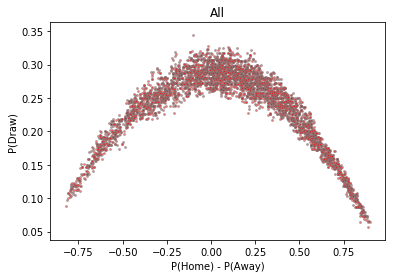

In [16]:
plot_probabilities(bet_probs,'All')

<li>In other words, we can discretize P(home win) – P(away win) values into bins (i.e. (-1,-0.8], (-
0.8, -0.6], …, (0.8,1]) and calculate the number of games ended as “Draw” in the corresponding 
bin. Dividing this value by the total number of games in the corresponding bin will provide the
estimated probability of draws. If this probability (calculated from the sample) is larger than the
probability proposed by the bookmaker, one can potentially make money in the long run by
betting on “Draw” for the games whose odds reside in the corresponding bin.</li>


In [17]:
def mark_draws(df):
    '''This function returns a series of ones and zeros where matched ended as draw recorded as 1'''
    return df["FTR"].apply(lambda x: 1 if x=="D" else 0)

def add_draw_column(df,series):
    '''This function adds series to a selected dataframe'''
    return df.assign(draw=series)

def draw_transform(dict,df):
    '''This functions adds a draw column for the all items in the given dictionary'''
    a=mark_draws(df)
    return {k:add_draw_column(v,a) for k,v in dict.items()}

draw_added_dict=draw_transform(bet_probs,merged_df)
draw_added_dict_with_margins=draw_transform(bet_probs_with_margin,merged_df)


In [18]:
def separete_into_bins(series,num_bins=11):
    '''This function separate series into bins'''
    bins=np.linspace(-1,1,num_bins)
    return pd.cut(series,bins)

def calculate_home_away_wrt_bins(df,binned):
    '''This function groups given dataframe with respect to the bins and calculate P(home win)- P(away win) for each bin'''
    return get_home_away_diff(df).groupby(binned).sum()/get_home_away_diff(df).groupby(binned).count()

def calculate_actual_draw_wrt_bins(df,binned):
    '''This function groups given dataframe with respect to the bins and calculate P(draw) by actual result for each bin'''
    return df['draw'].groupby(binned).sum()/df['draw'].groupby(binned).count()
   
    
def plot_compare_actual_and_bet(dict,new_plot=True,alpha=0.5,bookmaker='B365',num_bins=11,red_cards='',reset=True):
    '''This function plots two scatter plots in the same graph for [x] and [y] where [x] is [P(home win) - P(away win)] 
    where y is [P(draw(from bet probabilities), P(draw(frow actual game results))] for the given dictionary'''
    df=dict[bookmaker]
    binned=separete_into_bins(get_home_away_diff(df),num_bins=11)
    bet_home_away_diff=calculate_home_away_wrt_bins(df,binned)
    actual_draw=calculate_actual_draw_wrt_bins(df,binned)
    if new_plot==True:
        plt.figure()
    c1,c2=get_colors(reset)
    plt.scatter(bet_home_away_diff,actual_draw,color=c1,alpha=0.5,label=('Actaul Draw Probabilities'+red_cards))
    plt.scatter(get_home_away_diff(df),get_draw(df),color=c2,s=1,label=('Bet Probabilities'+red_cards))
    plt.title(bookmaker)
    plt.xlabel("P(Home) - P(Away)")
    plt.ylabel("P(Draw)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
    
    
def get_colors(reset):
    '''This function returns two different colors, use for plotting in different colors'''
    if reset==True:
        color()
    else:
        pass    
    c1=random.choice(colors)
    colors.remove(c1)
    c2=random.choice(colors)
    return c1,c2

def color():
    '''This function define global colors variable in order to prevent plotting in the same color'''
    global colors
    colors=['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','black','yellow']


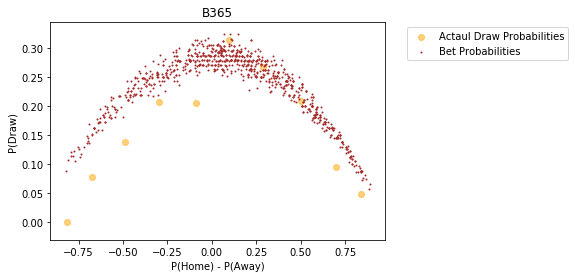

In [19]:
plot_compare_actual_and_bet(draw_added_dict)

<li> You will do this for each bookmaker separately (You will construct at least 4 plots in total).
Comment on if there is a bias in odds representing the probabilities? Name the x and y axes
accordingly. Write the name of bookmaker at the top of each plot.</li>
    

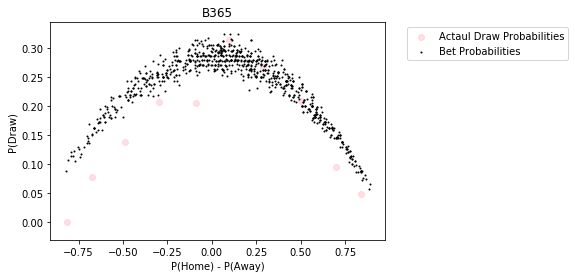

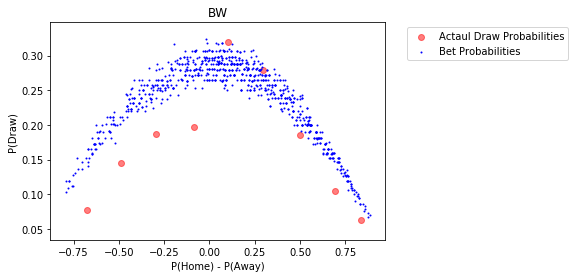

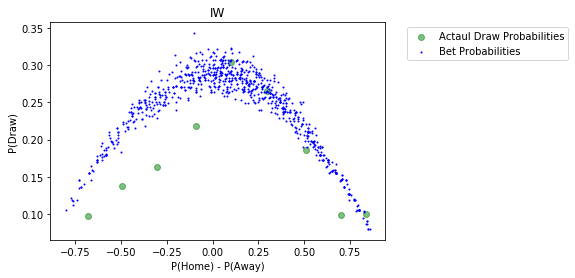

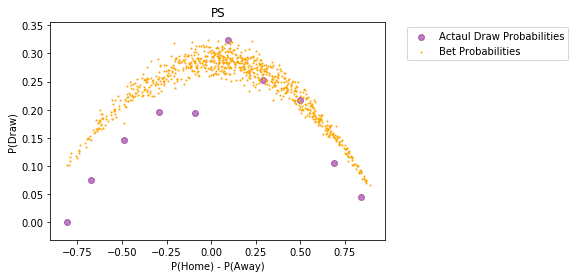

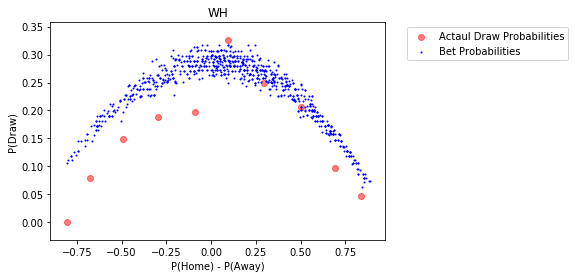

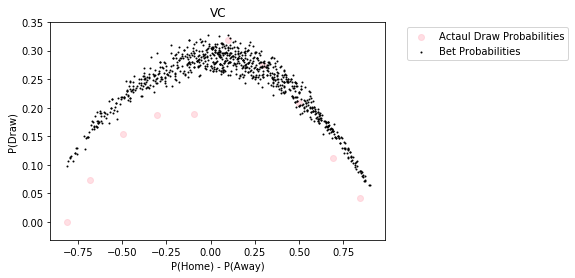

In [20]:
for items in bet_companies:    
    plot_compare_actual_and_bet(draw_added_dict,bookmaker=items,num_bins=20)

According to graphs, when P(Home)-P(Away) is smaller than 0 there is a significant difference between bet 
probabilities and actual probababilities. This indicates that, there is a biased in bet probabilities. When
P(Home)-P(Away) is between [0,0.5] the difference is that obvious. In between [0,0.25] actual draw probability 
seems slightly higher than the bets probability. For this interval it is logical to bet on draws. For other
intervals betting on draw doesnt seem logical. However, it is important to remind that these bet probabilities are
calculated with transformation, in other word, bookmaker margins are excluded. So in order to make decision it is 
better to include margins. 

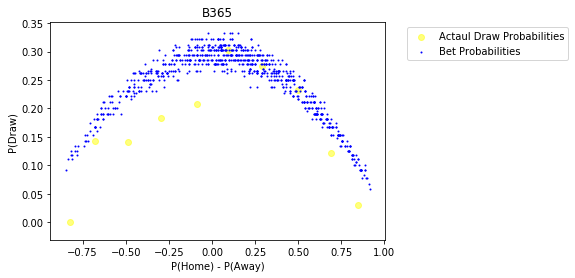

In [21]:
plot_compare_actual_and_bet(draw_added_dict_with_margins)

As seen from the plot it is not likely to win in the long run.

<h2>Task 3</h2><br>
There can be some events during the matches that create noise in the outcomes. To be more specific,
let’s consider a specific case. Bookings can affect the game result. A red card in the first few minutes
of a game can change the outcome of the match drastically. Playing with few players is always a
disadvantage for the teams.<br>
Perform third and fourth subtask of Task 2 again after removing the matches fitting well to the case
above. Is there any significant change in the observations you have for Task 2? Comment on the results.

In [22]:
def mark_red_cards(df):
    '''This function returns a series of ones and zeros where matches ended with at least one red card is recorded as 1'''
    sum_rc=df['HR']+df['AR'] 
    return sum_rc.apply(lambda x: 1 if x!=0 else 0)

def exclude_red_cards(df,series):
    '''This function exludes all red card shown matches from the given dataframe'''
    df1=df.assign(card=series)
    return df1.loc[df1['card']==0,:] 

def red_card_transform(dict,df):
    '''This function exludes all red card matches from the given dictionary'''
    a=mark_red_cards(df)
    return {k:exclude_red_cards(v,a) for k,v in dict.items()}

def plot_compare_red_card(no_red_card_dict,draw_added_dict,bookmaker='B365'):
    '''This function exacutes plot_compare_actual_and_bet for all matches and no red card matches'''
    plot_compare_actual_and_bet(no_red_card_dict,new_plot=True,alpha=1,bookmaker=bookmaker,red_cards=' (red cards excluded)')
    plot_compare_actual_and_bet(draw_added_dict,new_plot=False,bookmaker=bookmaker,reset=False)
    return plt.show()
    
no_red_card_dict=red_card_transform(draw_added_dict,merged_df)


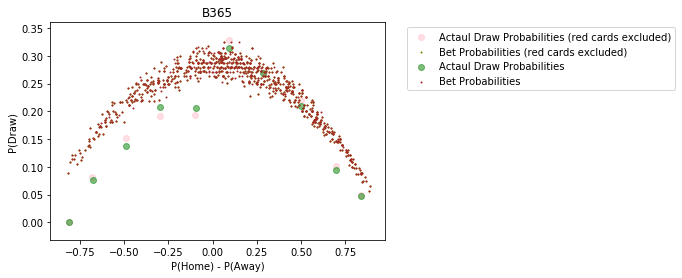

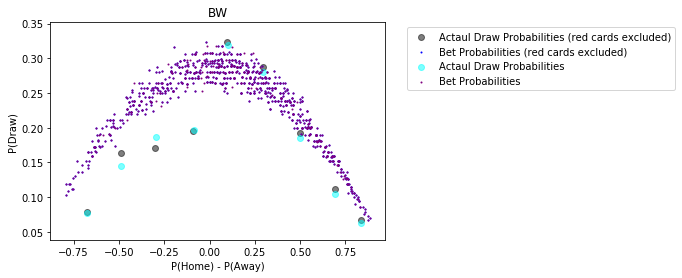

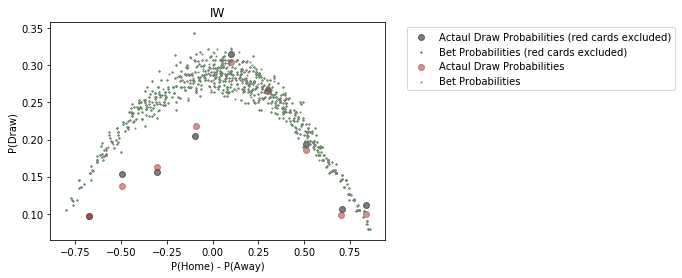

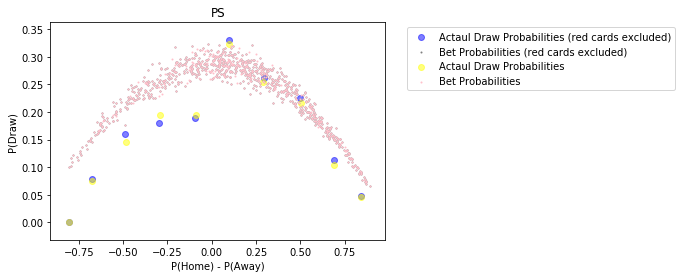

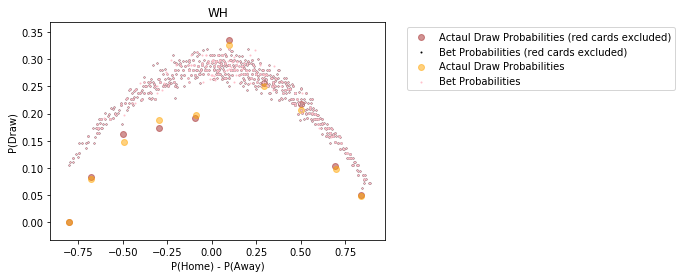

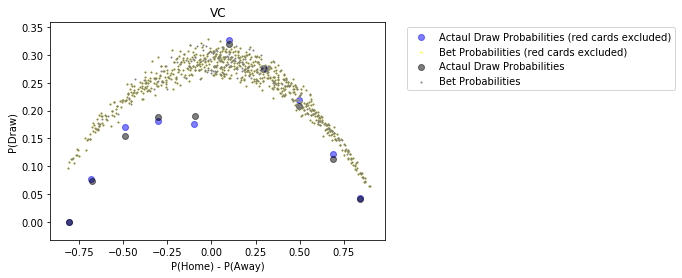

In [23]:
for items in bet_companies:    
    plot_compare_red_card(no_red_card_dict,draw_added_dict,bookmaker=items)

For the matches with no red cards (red card matches excluded), the actual draw probabalities have slightly changed. 
For most of the regions the actual probabilities shifted up except for the interval [-0.25,0]. In this interval, the 
probabilities decreased. Upward shifts decrease the gap between actual probability and bet probability in our case.
However, even after the shift there is a significant gap between actual and bet probabilities in [0,0.25] which
indicates that there is bias after removing the red card games.

In the question, it is stated that a red card in the first minutes of the game can affect the score drastically.
However, in the given dataset there is no sufficent information to determine whether the red card is taken early 
in the game or not. So, by following a different approach, we can make a hypothesis which claims, the red cards
taken in the late game are for avoiding possible goals which might be the reason behind the inconsist down shift
in the interval [-0.25,0]. 
    
Or in a similar mindset with the question, it can be asserted that the red cards in the late game doesn't affect the
matches outcome. If the red card time data is obtain, then, a similar graph can be plotted for better judgement. 